In [1]:
BATCH_SIZE = 4
EPOCHS = 2

In [ ]:
from preprocess_dataset import create_test_dataset, create_train_dataset, MelanomaDataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)  # mean, Standard diviation,  channels

train_loader = DataLoader(
    MelanomaDataset(create_train_dataset(), transform=transform),
    BATCH_SIZE,
    shuffle=True,
    num_workers=5,
)

test_loader = DataLoader(
    MelanomaDataset(create_test_dataset(), transform=transform),
    BATCH_SIZE,
    shuffle=False,
    num_workers=5,
)

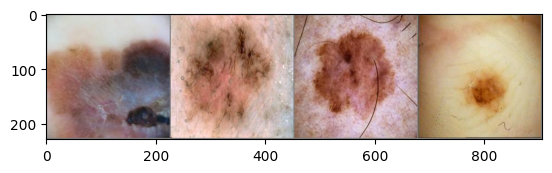

1.0 1.0 1.0 0.0


In [3]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.__next__()


imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{labels[j]}' for j in range(BATCH_SIZE)))